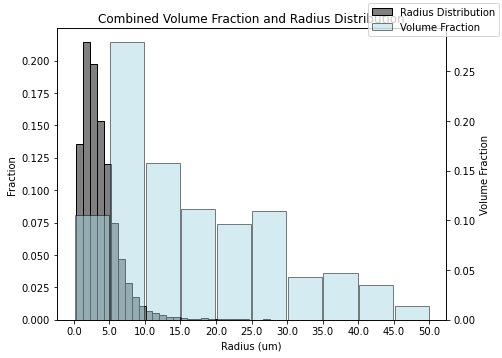

Ntot (Total vesicles): 37663
Vtot (Total volume in nL): 34.613346942588905
Mean radius (um): 3.7336173829510066
Standard deviation of radius (um): 2.854443777893914
0.6544581384415014


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Constants
pixel_to_um = 0.645  # 1 pixel = 0.645 um
pi = np.pi

# Get all CSV files in the current directory
csv_files = glob.glob("*.csv")

# Initialize a list to store data
all_data = []

# Process each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    df['Filename'] = os.path.basename(file)  # Store filename
    df['Radius_px'] = np.sqrt(df['Area'] / pi)
    df['Radius_um'] = df['Radius_px'] * pixel_to_um
    df['Volume_pL'] = (4 / 3) * pi * (df['Radius_um'] ** 3) * 1e-3  # Convert to pL
    all_data.append(df)

# Concatenate all data
data = pd.concat(all_data, ignore_index=True)

# Summary statistics
Ntot = len(data)  # Total number of vesicles
Vtot = data['Volume_pL'].sum() * 1e-3  # Total volume in nL
mean_radius = data['Radius_um'].mean()
std_radius = data['Radius_um'].std()

# Bin data by radius ranges of 5 um and calculate volume fraction
bins = np.arange(0, data['Radius_um'].max() + 5, 5)
data['Radius_bin'] = pd.cut(data['Radius_um'], bins)
volume_by_bin = data.groupby('Radius_bin')['Volume_pL'].sum()
volume_fraction = volume_by_bin / volume_by_bin.sum()

# Create third plot: Volume fraction and radius distribution
fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot radius distribution (gray, opaque) with fixed bin count
n, bins, patches = ax1.hist(data['Radius_um'], bins=50, color='gray', alpha=1, density=True, edgecolor='black', label='Radius Distribution')
ax1.set_xlabel('Radius (um)')
ax1.set_ylabel('Fraction', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(np.arange(0, data['Radius_um'].max() + 5, 5))

# Plot volume fraction (light blue, transparent) with correctly aligned x-axis
ax2 = ax1.twinx()
ax2.bar(np.arange(len(volume_fraction)) * 5 + 2.5, volume_fraction.values, width=4.8, color='lightblue', alpha=0.5, edgecolor='black', label='Volume Fraction')
#ax2.bar(np.arange(len(volume_fraction)) * 5 + 2.5, volume_fraction.values, width=4.8, color='lightblue', alpha=0.8, label='Volume Fraction')
ax2.set_ylabel('Volume Fraction', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_xticks(np.arange(0, data['Radius_um'].max() + 5, 5))
ax2.set_xticklabels(np.arange(0, data['Radius_um'].max() + 5, 5))

# Add legend
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.title('Combined Volume Fraction and Radius Distribution')
plt.tight_layout()
plt.savefig("combined size-volume.svg", format='svg')
plt.show()

# Output results
print("Ntot (Total vesicles):", Ntot)
print("Vtot (Total volume in nL):", Vtot)
print("Mean radius (um):", mean_radius)
print("Standard deviation of radius (um):", std_radius)
print(volume_fraction[0]+volume_fraction[1]+volume_fraction[2]+volume_fraction[3])
